In [1]:
import pandas as pd

In [2]:
df_facturation = pd.read_csv('data/facturation_train.csv')
df_performance = pd.read_csv('data/performance_train.csv')
df_paiements = pd.read_csv('data/paiements_train.csv')
df_transactions = pd.read_csv('data/transactions_train.csv')

In [3]:
df_paiements['TRANSACTION_AMT'] = df_paiements['TRANSACTION_AMT'].fillna(0)
df_paiements['TRANSACTION_DTTM'] = df_paiements['TRANSACTION_DTTM'].fillna('9999-99-99')
df_paiements['PAYMENT_REVERSAL_XFLG'] = df_paiements['PAYMENT_REVERSAL_XFLG'].fillna('Q')

df_paiements[df_paiements.isnull().any(axis=1)]

Empty DataFrame
Columns: [ID_CPTE, TRANSACTION_AMT, TRANSACTION_DTTM, PAYMENT_REVERSAL_XFLG]
Index: []

In [4]:
df_paiements = df_paiements.dropna()

df_paiements['YEAR_MONTH'] = df_paiements['TRANSACTION_DTTM'].map(lambda x: str(x)[:7])
df_paiements["CPTE_PERIOD_ID"] = df_paiements["ID_CPTE"].map(str) + '_' + df_paiements["YEAR_MONTH"]

df_remboursements = df_paiements[df_paiements.PAYMENT_REVERSAL_XFLG == 'N']
df_paiements = df_paiements[df_paiements.PAYMENT_REVERSAL_XFLG == 'Q']

In [5]:
group_reversed = df_remboursements.groupby(['CPTE_PERIOD_ID'])
group_paid = df_paiements.groupby(['CPTE_PERIOD_ID'])

In [6]:
df_reversed_ammount = pd.DataFrame(group_reversed.sum()['TRANSACTION_AMT'])
df_reversed_ammount['COUNT_XFLG-N'] = group_reversed.count()['PAYMENT_REVERSAL_XFLG']
df_reversed_ammount.rename(columns={'TRANSACTION_AMT': 'TRANSACTION_AMT_REFUNDED'}, inplace=True)
df_reversed_ammount.reset_index(level=0, inplace=True)

df_paid_ammount = pd.DataFrame(group_paid.sum()['TRANSACTION_AMT'])
df_paid_ammount['COUNT_XFLG-Q'] = group_paid.count()['PAYMENT_REVERSAL_XFLG']
df_paid_ammount.rename(columns={'TRANSACTION_AMT': 'TRANSACTION_AMT_PAID'}, inplace=True)
df_paid_ammount.reset_index(level=0, inplace=True)

df_paie_remb = pd.merge(df_paid_ammount, df_reversed_ammount[['CPTE_PERIOD_ID','TRANSACTION_AMT_REFUNDED','COUNT_XFLG-N']], how = 'outer', left_on = 'CPTE_PERIOD_ID', right_on = 'CPTE_PERIOD_ID')
df_paie_remb.fillna(0, inplace=True)

In [7]:
df_facturation['YEAR_MONTH'] = df_facturation['PERIODID_MY'].map(lambda x: str(x)[:7])
df_facturation["CPTE_PERIOD_ID"] = df_facturation["ID_CPTE"].map(str) + '_' + df_facturation["YEAR_MONTH"]
df_facturation.isnull().values.any()

False

In [8]:
df_facturation = pd.merge(df_facturation, df_paie_remb , right_on='CPTE_PERIOD_ID', left_on='CPTE_PERIOD_ID', how='outer')
df_facturation[df_facturation.isnull().any(axis=1)]

ID_CPTE PERIODID_MY StatementDate  CurrentTotalBalance  \
1       99690111.0  2014-11-01    2014-11-03               866.00   
7       99690111.0  2014-12-01    2014-12-03              1151.85   
17      57427180.0  2012-12-01    2012-11-29               266.06   
21      57427180.0  2012-03-01    2012-03-03               809.12   
22      57427180.0  2012-11-01    2012-10-31               689.52   
25      57427180.0  2012-02-01    2012-02-03               234.00   
26      57427180.0  2011-11-01    2011-11-04               392.20   
27      57427180.0  2011-12-01    2011-12-02               219.00   
35      29617912.0  2014-12-01    2014-11-29               301.04   
40      29617912.0  2014-11-01    2014-10-31               468.64   
44      61632809.0  2015-08-01    2015-08-13               661.26   
48      61632809.0  2015-06-01    2015-06-17               766.48   
49      61632809.0  2014-11-01    2014-11-15               348.84   
53      61632809.0  2014-12-01    2014-12-13               914.64   
59      14117855.0  2013-02-01    2013-02-13               884.77   
61      14117855.0  2012-11-01    2012-11-15              1249.04   
64      14117855.0  2012-12-01    2012-12-13               833.27   
65      14117855.0  2013-05-01    2013-05-18              1180.21   
67      14117855.0  2013-09-01    2013-09-18              1275.14   
74      23700394.0  2012-11-01    2012-11-15                 0.00   
79      23700394.0  2012-12-01    2012-12-13                77.70   
91      27881705.0  2011-12-01    2011-12-16               994.00   
97      27881705.0  2011-11-01    2011-11-19               721.18   
101     46100731.0  2011-12-01    2011-12-14               729.75   
103     46100731.0  2011-11-01    2011-11-18               803.40   
104     46100731.0  2012-01-01    2012-01-20              1559.26   
108     46100731.0  2012-05-01    2012-05-14               577.32   
112     58512689.0  2013-12-01    2013-12-13              2904.72   
113     58512689.0  2013-11-01    2013-11-15              2533.40   
116     58512689.0  2014-11-01    2014-11-18               781.77   
...            ...         ...           ...                  ...   
167467         NaN         NaN           NaN                  NaN   
167468         NaN         NaN           NaN                  NaN   
167469         NaN         NaN           NaN                  NaN   
167470         NaN         NaN           NaN                  NaN   
167471         NaN         NaN           NaN                  NaN   
167472         NaN         NaN           NaN                  NaN   
167473         NaN         NaN           NaN                  NaN   
167474         NaN         NaN           NaN                  NaN   
167475         NaN         NaN           NaN                  NaN   
167476         NaN         NaN           NaN                  NaN   
167477         NaN         NaN           NaN                  NaN   
167478         NaN         NaN           NaN                  NaN   
167479         NaN         NaN           NaN                  NaN   
167480         NaN         NaN           NaN                  NaN   
167481         NaN         NaN           NaN                  NaN   
167482         NaN         NaN           NaN                  NaN   
167483         NaN         NaN           NaN                  NaN   
167484         NaN         NaN           NaN                  NaN   
167485         NaN         NaN           NaN                  NaN   
167486         NaN         NaN           NaN                  NaN   
167487         NaN         NaN           NaN                  NaN   
167488         NaN         NaN           NaN                  NaN   
167489         NaN         NaN           NaN                  NaN   
167490         NaN         NaN           NaN                  NaN   
167491         NaN         NaN           NaN                  NaN   
167492         NaN         NaN           NaN                  NaN   
167493   

In [9]:
df_facturation[['TRANSACTION_AMT_PAID','COUNT_XFLG-Q','TRANSACTION_AMT_REFUNDED','COUNT_XFLG-N']] = df_facturation[['TRANSACTION_AMT_PAID','COUNT_XFLG-Q', 'TRANSACTION_AMT_REFUNDED', 'COUNT_XFLG-N']].fillna(0)
df_facturation = df_facturation.dropna() # drop les lignes de transactions où le compte n'avait pas d'infos
df_facturation[df_facturation.isnull().any(axis=1)]

Empty DataFrame
Columns: [ID_CPTE, PERIODID_MY, StatementDate, CurrentTotalBalance, CashBalance, CreditLimit, DelqCycle, YEAR_MONTH, CPTE_PERIOD_ID, TRANSACTION_AMT_PAID, COUNT_XFLG-Q, TRANSACTION_AMT_REFUNDED, COUNT_XFLG-N]
Index: []

In [10]:
df_facturation = pd.merge(df_facturation, df_performance[['ID_CPTE','Default']], right_on='ID_CPTE', left_on='ID_CPTE', how='outer')

In [11]:
df_facturation.corr()

ID_CPTE  CurrentTotalBalance  CashBalance  \
ID_CPTE                   1.000000            -0.006811    -0.004087   
CurrentTotalBalance      -0.006811             1.000000     0.291153   
CashBalance              -0.004087             0.291153     1.000000   
CreditLimit              -0.015966             0.494997     0.128159   
DelqCycle                 0.008605             0.053045     0.034813   
TRANSACTION_AMT_PAID     -0.007597             0.184747     0.031437   
COUNT_XFLG-Q              0.006847             0.034397     0.012622   
TRANSACTION_AMT_REFUNDED -0.001781            -0.000769    -0.000807   
COUNT_XFLG-N             -0.002287            -0.000631     0.003711   
Default                   0.016244             0.175303     0.139300   

                          CreditLimit  DelqCycle  TRANSACTION_AMT_PAID  \
ID_CPTE                     -0.015966   0.008605             -0.007597   
CurrentTotalBalance          0.494997   0.053045              0.184747   
CashBalance                  0.128159   0.034813              0.031437   
CreditLimit                  1.000000  -0.084344              0.304902   
DelqCycle                   -0.084344   1.000000             -0.067976   
TRANSACTION_AMT_PAID         0.304902  -0.067976              1.000000   
COUNT_XFLG-Q                -0.067603  -0.095616              0.259004   
TRANSACTION_AMT_REFUNDED     0.002625   0.000278              0.071124   
COUNT_XFLG-N                -0.001748   0.000320              0.033300   
Default                     -0.127098   0.213422             -0.084246   

                          COUNT_XFLG-Q  TRANSACTION_AMT_REFUNDED  \
ID_CPTE                       0.006847                 -0.001781   
CurrentTotalBalance           0.034397                 -0.000769   
CashBalance                   0.012622                 -0.000807   
CreditLimit                  -0.067603                  0.002625   
DelqCycle                    -0.095616                  0.000278   
TRANSACTION_AMT_PAID          0.259004                  0.071124   
COUNT_XFLG-Q                  1.000000                  0.002646   
TRANSACTION_AMT_REFUNDED      0.002646                  1.000000   
COUNT_XFLG-N                  0.008354                  0.454583   
Default                       0.023073                 -0.000709   

                          COUNT_XFLG-N   Default  
ID_CPTE                      -0.002287  0.016244  
CurrentTotalBalance          -0.000631  0.175303  
CashBalance                   0.003711  0.139300  
CreditLimit                  -0.001748 -0.127098  
DelqCycle                     0.000320  0.213422  
TRANSACTION_AMT_PAID          0.033300 -0.084246  
COUNT_XFLG-Q                  0.008354  0.023073  
TRANSACTION_AMT_REFUNDED      0.454583 -0.000709  
COUNT_XFLG-N                  1.000000  0.004358  
Default                       0.004358  1.000000

In [12]:
df1 = df_facturation
#df1 = df1[df1.ID_CPTE == 94147317].sort_values(['PERIODID_MY_x']).tail(13)
df1


ID_CPTE PERIODID_MY StatementDate  CurrentTotalBalance  \
0       99690111.0  2015-05-01    2015-05-03              8497.84   
1       99690111.0  2014-11-01    2014-11-03               866.00   
2       99690111.0  2015-06-01    2015-05-31             10790.95   
3       99690111.0  2015-10-01    2015-10-04             12388.46   
4       99690111.0  2015-11-01    2015-11-02             12746.50   
5       99690111.0  2015-08-01    2015-08-02             10610.05   
6       99690111.0  2015-09-01    2015-08-30             11417.12   
7       99690111.0  2014-12-01    2014-12-03              1151.85   
8       99690111.0  2015-02-01    2015-01-31              4045.67   
9       99690111.0  2015-12-01    2015-11-30             13119.60   
10      99690111.0  2015-01-01    2015-01-02              2298.96   
11      99690111.0  2015-03-01    2015-03-03              5926.20   
12      99690111.0  2015-04-01    2015-03-31              6916.62   
13      99690111.0  2015-07-01    2015-07-05             10560.00   
14      57427180.0  2012-08-01    2012-08-02               243.41   
15      57427180.0  2012-10-01    2012-10-04               489.72   
16      57427180.0  2012-05-01    2012-05-03               260.00   
17      57427180.0  2012-12-01    2012-11-29               266.06   
18      57427180.0  2012-07-01    2012-07-06               416.00   
19      57427180.0  2012-06-01    2012-06-02               210.08   
20      57427180.0  2012-01-01    2012-01-02               233.58   
21      57427180.0  2012-03-01    2012-03-03               809.12   
22      57427180.0  2012-11-01    2012-10-31               689.52   
23      57427180.0  2012-09-01    2012-08-31               410.88   
24      57427180.0  2012-04-01    2012-03-31              1058.84   
25      57427180.0  2012-02-01    2012-02-03               234.00   
26      57427180.0  2011-11-01    2011-11-04               392.20   
27      57427180.0  2011-12-01    2011-12-02               219.00   
28      29617912.0  2015-02-01    2015-01-30               135.00   
29      29617912.0  2015-09-01    2015-08-30               229.84   
...            ...         ...           ...                  ...   
166513  97548597.0  2012-12-01    2012-12-21              2945.71   
166514  97548597.0  2012-11-01    2012-11-27              1114.86   
166515  12603910.0  2012-12-01    2012-12-22              2267.34   
166516  12603910.0  2012-11-01    2012-11-21              1733.49   
166517  12603910.0  2012-10-01    2012-10-22              1944.04   
166518  12603910.0  2012-09-01    2012-09-24              4091.16   
166519  12603910.0  2012-08-01    2012-08-20              2995.56   
166520  12603910.0  2012-07-01    2012-07-20              2387.64   
166521  12603910.0  2012-06-01    2012-06-23              2424.24   
166522  12603910.0  2012-05-01    2012-05-21              7943.25   
166523  12603910.0  2012-04-01    2012-04-23              2135.12   
166524  12603910.0  2012-03-01    2012-03-19              2221.00   
166525  12603910.0  2012-02-01    2012-02-17              2218.11   
166526  12603910.0  2012-01-01    2012-01-23              1897.11   
166527  12603910.0  2011-12-01    2011-12-22              1789.00   
166528  12603910.0  2011-11-01    2011-11-24              2016.00   
166529  11346742.0  2015-12-01    2015-12-16              2140.34   
166530  11346742.0  2015-11-01    2015-11-13              2727.00   
166531  11346742.0  2015-10-01    2015-10-19              2500.02   
166532  11346742.0  2015-09-01    2015-09-16              2036.26   
166533  11346742.0  2015-08-01    2015-08-13              1609.00   
166534  11346742.0  2015-07-01    2015-07-16              2023.37   
166535  11346742.0  2015-06-01    2015-06-12              1955.20   
166536  11346742.0  2015-05-01    2015-05-11              2276.88   
166537  11346742.0  2015-04-01    2015-04-13              2633.28   
166538  11346742.0  2015-03-01    2015-03-15              1793.32   
166539  1

In [13]:
#df1.ID_CPTE.unique()
#df1.isnull().values.any()
df1[df1.ID_CPTE == 99690111].sort_values(['PERIODID_MY']).tail(12)

ID_CPTE PERIODID_MY StatementDate  CurrentTotalBalance  CashBalance  \
10  99690111.0  2015-01-01    2015-01-02              2298.96       350.00   
8   99690111.0  2015-02-01    2015-01-31              4045.67      1148.45   
11  99690111.0  2015-03-01    2015-03-03              5926.20      2567.25   
12  99690111.0  2015-04-01    2015-03-31              6916.62      3307.33   
0   99690111.0  2015-05-01    2015-05-03              8497.84      4293.12   
2   99690111.0  2015-06-01    2015-05-31             10790.95      5224.44   
13  99690111.0  2015-07-01    2015-07-05             10560.00      5127.54   
5   99690111.0  2015-08-01    2015-08-02             10610.05      4753.35   
6   99690111.0  2015-09-01    2015-08-30             11417.12      4616.46   
3   99690111.0  2015-10-01    2015-10-04             12388.46      4786.08   
4   99690111.0  2015-11-01    2015-11-02             12746.50      4818.48   
9   99690111.0  2015-12-01    2015-11-30             13119.60      4791.44   

    CreditLimit  DelqCycle YEAR_MONTH    CPTE_PERIOD_ID  TRANSACTION_AMT_PAID  \
10      12000.0        0.0    2015-01  99690111_2015-01                 262.5   
8       16200.0        0.0    2015-02  99690111_2015-02                 303.0   
11      16200.0        0.0    2015-03  99690111_2015-03                 200.0   
12      16200.0        0.0    2015-04  99690111_2015-04                 288.8   
0       16200.0        0.0    2015-05  99690111_2015-05                 176.8   
2       16200.0        0.0    2015-06  99690111_2015-06                 303.0   
13      16200.0        0.0    2015-07  99690111_2015-07                 618.0   
5       16200.0        0.0    2015-08  99690111_2015-08                 267.5   
6       16200.0        0.0    2015-09  99690111_2015-09                 226.6   
3       16200.0        0.0    2015-10  99690111_2015-10                 244.8   
4       16200.0        0.0    2015-11  99690111_2015-11                 250.0   
9       16200.0        0.0    2015-12  99690111_2015-12                 273.0   

    COUNT_XFLG-Q  TRANSACTION_AMT_REFUNDED  COUNT_XFLG-N  Default  
10           1.0                       0.0           0.0        0  
8            1.0                       0.0           0.0        0  
11           1.0                       0.0           0.0        0  
12           2.0                       0.0           0.0        0  
0            1.0                       0.0           0.0        0  
2            1.0                       0.0           0.0        0  
13           1.0                       0.0           0.0        0  
5            1.0                       0.0           0.0        0  
6            1.0                       0.0           0.0        0  
3            1.0                       0.0           0.0        0  
4            1.0                       0.0           0.0        0  
9            1.0                       0.0           0.0        0

In [14]:
df_final = pd.DataFrame(index=range(0,11900),columns=[['ID_CPTE',
                                                      'Default',
                                                      'Year',
                                                      'CreditLimit_sum','CreditLimit_mean','CreditLimit_max','CreditLimit_min','CreditLimit_std',
                                                      'CurrentTotalBalance_sum','CurrentTotalBalance_mean','CurrentTotalBalance_max','CurrentTotalBalance_min','CurrentTotalBalance_std',
                                                      'CashBalance_sum','CashBalance_mean','CashBalance_max','CashBalance_min','CashBalance_std',
                                                      'DelqCycle_sum','DelqCycle_mean','DelqCycle_max','DelqCycle_min','DelqCycle_std',
                                                      'TRANSACTION_AMT_PAID_sum','TRANSACTION_AMT_PAID_mean','TRANSACTION_AMT_PAID_max','TRANSACTION_AMT_PAID_min','TRANSACTION_AMT_PAID_std',
                                                      'COUNT_XFLG-Q_sum','COUNT_XFLG-Q_mean','COUNT_XFLG-Q_max','COUNT_XFLG-Q_min','COUNT_XFLG-Q_std',
                                                      'CreditLimit_month_1',
                                                      'CreditLimit_month_2',
                                                      'CreditLimit_month_3',
                                                      'CreditLimit_month_4',
                                                      'CreditLimit_month_5',
                                                      'CreditLimit_month_6',
                                                      'CreditLimit_month_7',
                                                      'CreditLimit_month_8',
                                                      'CreditLimit_month_9',
                                                      'CreditLimit_month_10',
                                                      'CreditLimit_month_11',
                                                      'CreditLimit_month_12',
                                                      #'CurrentTotalBalance_month_13',
                                                      'CurrentTotalBalance_month_1',
                                                      'CurrentTotalBalance_month_2',
                                                      'CurrentTotalBalance_month_3',
                                                      'CurrentTotalBalance_month_4',
                                                      'CurrentTotalBalance_month_5',
                                                      'CurrentTotalBalance_month_6',
                                                      'CurrentTotalBalance_month_7',
                                                      'CurrentTotalBalance_month_8',
                                                      'CurrentTotalBalance_month_9',
                                                      'CurrentTotalBalance_month_10',
                                                      'CurrentTotalBalance_month_11',
                                                      'CurrentTotalBalance_month_12',
                                                      #'CurrentTotalBalance_month_13',
                                                      'CashBalance_month_1',
                                                      'CashBalance_month_2',
                                                      'CashBalance_month_3',
                                                      'CashBalance_month_4',
                                                      'CashBalance_month_5',
                                                      'CashBalance_month_6',
                                                      'CashBalance_month_7',
                                                      'CashBalance_month_8',
                                                      'CashBalance_month_9',
                                                      'CashBalance_month_10',
                                                      'CashBalance_month_11',
                                                      'CashBalance_month_12',
                                                      #'CashBalance_month_13',
                                                      'DelqCycle_month_1',
                                                      'DelqCycle_month_2',
                                                      'DelqCycle_month_3',
                                                      'DelqCycle_month_4',
                                                      'DelqCycle_month_5',
                                                      'DelqCycle_month_6',
                                                      'DelqCycle_month_7',
                                                      'DelqCycle_month_8',
                                                      'DelqCycle_month_9',
                                                      'DelqCycle_month_10',
                                                      'DelqCycle_month_11',
                                                      'DelqCycle_month_12',
                                                      #'DelqCycle_month_13',
                                                      'TRANSACTION_AMT_PAID_month_1',
                                                      'TRANSACTION_AMT_PAID_month_2',
                                                      'TRANSACTION_AMT_PAID_month_3',
                                                      'TRANSACTION_AMT_PAID_month_4',
                                                      'TRANSACTION_AMT_PAID_month_5',
                                                      'TRANSACTION_AMT_PAID_month_6',
                                                      'TRANSACTION_AMT_PAID_month_7',
                                                      'TRANSACTION_AMT_PAID_month_8',
                                                      'TRANSACTION_AMT_PAID_month_9',
                                                      'TRANSACTION_AMT_PAID_month_10',
                                                      'TRANSACTION_AMT_PAID_month_11',
                                                      'TRANSACTION_AMT_PAID_month_12',
                                                      #'TRANSACTION_AMT_PAID_month_13',
                                                      'TRANSACTION_AMT_REFUNDED_month_1',
                                                      'TRANSACTION_AMT_REFUNDED_month_2',
                                                      'TRANSACTION_AMT_REFUNDED_month_3',
                                                      'TRANSACTION_AMT_REFUNDED_month_4',
                                                      'TRANSACTION_AMT_REFUNDED_month_5',
                                                      'TRANSACTION_AMT_REFUNDED_month_6',
                                                       'TRANSACTION_AMT_REFUNDED_month_7',
                                                       'TRANSACTION_AMT_REFUNDED_month_8',
                                                       'TRANSACTION_AMT_REFUNDED_month_9',
                                                       'TRANSACTION_AMT_REFUNDED_month_10',
                                                       'TRANSACTION_AMT_REFUNDED_month_11',
                                                       'TRANSACTION_AMT_REFUNDED_month_12',
                                                       #'TRANSACTION_AMT_REFUNDED_month_13',
                                                       'COUNT_XFLG-Q_month_1',
                                                       'COUNT_XFLG-Q_month_2',
                                                       'COUNT_XFLG-Q_month_3',
                                                       'COUNT_XFLG-Q_month_4',
                                                       'COUNT_XFLG-Q_month_5',
                                                       'COUNT_XFLG-Q_month_6',
                                                       'COUNT_XFLG-Q_month_7',
                                                       'COUNT_XFLG-Q_month_8',
                                                       'COUNT_XFLG-Q_month_9',
                                                       'COUNT_XFLG-Q_month_10',
                                                       'COUNT_XFLG-Q_month_11',
                                                       'COUNT_XFLG-Q_month_12',
                                                       #'COUNT_XFLG-Q_month_13',
                                                       'COUNT_XFLG-N_month_1',
                                                       'COUNT_XFLG-N_month_2',
                                                       'COUNT_XFLG-N_month_3',
                                                       'COUNT_XFLG-N_month_4',
                                                       'COUNT_XFLG-N_month_5',
                                                       'COUNT_XFLG-N_month_6',
                                                       'COUNT_XFLG-N_month_7',
                                                       'COUNT_XFLG-N_month_8',
                                                       'COUNT_XFLG-N_month_9',
                                                       'COUNT_XFLG-N_month_10',
                                                       'COUNT_XFLG-N_month_11',
                                                       'COUNT_XFLG-N_month_12',
                                                       #'COUNT_XFLG-N_month_13',
                                                      ]])
df_final.head()

ID_CPTE Default Year CreditLimit_sum CreditLimit_mean CreditLimit_max  \
0     NaN     NaN  NaN             NaN              NaN             NaN   
1     NaN     NaN  NaN             NaN              NaN             NaN   
2     NaN     NaN  NaN             NaN              NaN             NaN   
3     NaN     NaN  NaN             NaN              NaN             NaN   
4     NaN     NaN  NaN             NaN              NaN             NaN   

  CreditLimit_min CreditLimit_std CurrentTotalBalance_sum  \
0             NaN             NaN                     NaN   
1             NaN             NaN                     NaN   
2             NaN             NaN                     NaN   
3             NaN             NaN                     NaN   
4             NaN             NaN                     NaN   

  CurrentTotalBalance_mean          ...          COUNT_XFLG-N_month_3  \
0                      NaN          ...                           NaN   
1                      NaN          ...                           NaN   
2                      NaN          ...                           NaN   
3                      NaN          ...                           NaN   
4                      NaN          ...                           NaN   

  COUNT_XFLG-N_month_4 COUNT_XFLG-N_month_5 COUNT_XFLG-N_month_6  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

  COUNT_XFLG-N_month_7 COUNT_XFLG-N_month_8 COUNT_XFLG-N_month_9  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

  COUNT_XFLG-N_month_10 COUNT_XFLG-N_month_11 COUNT_XFLG-N_month_12  
0                   NaN                   NaN                   NaN  
1                   NaN                   NaN                   NaN  
2                   NaN                   NaN                   NaN  
3                   NaN                   NaN                   NaN  
4                   NaN                   NaN                   NaN  

[5 rows x 129 columns]

In [94]:
df1[df1.ID_CPTE == 43462064].sort_values(['PERIODID_MY']).tail(12)

ID_CPTE PERIODID_MY StatementDate  CurrentTotalBalance  CashBalance  \
29787  43462064.0  2012-01-01    2012-01-04              1262.10          0.0   
29790  43462064.0  2012-02-01    2012-02-03              1258.68          0.0   
29786  43462064.0  2012-03-01    2012-02-29              1112.00          0.0   
29785  43462064.0  2012-04-01    2012-04-06              1089.92          0.0   
29784  43462064.0  2012-05-01    2012-05-01              1084.26          0.0   
29777  43462064.0  2012-06-01    2012-06-01              1101.60          0.0   
29783  43462064.0  2012-07-01    2012-07-03              1166.00          0.0   
29782  43462064.0  2012-08-01    2012-08-01              1055.25          0.0   
29781  43462064.0  2012-09-01    2012-09-04              1071.66          0.0   
29778  43462064.0  2012-10-01    2012-10-06              1198.50          0.0   
29780  43462064.0  2012-11-01    2012-11-03              1230.85          0.0   
29779  43462064.0  2012-12-01    2012-12-01              1180.84          0.0   

       CreditLimit  DelqCycle YEAR_MONTH    CPTE_PERIOD_ID  \
29787       1000.0        0.0    2012-01  43462064_2012-01   
29790       1000.0        1.0    2012-02  43462064_2012-02   
29786       1000.0        0.0    2012-03  43462064_2012-03   
29785       1000.0        0.0    2012-04  43462064_2012-04   
29784       1000.0        1.0    2012-05  43462064_2012-05   
29777       1000.0        2.0    2012-06  43462064_2012-06   
29783       1000.0        3.0    2012-07  43462064_2012-07   
29782       1000.0        2.0    2012-08  43462064_2012-08   
29781       1000.0        1.0    2012-09  43462064_2012-09   
29778       1000.0        1.0    2012-10  43462064_2012-10   
29780       1000.0        2.0    2012-11  43462064_2012-11   
29779       1000.0        1.0    2012-12  43462064_2012-12   

       TRANSACTION_AMT_PAID  COUNT_XFLG-Q  TRANSACTION_AMT_REFUNDED  \
29787                  0.00           0.0                       0.0   
29790                144.20           1.0                       0.0   
29786                 85.00           1.0                       0.0   
29785                  0.00           0.0                       0.0   
29784                  0.00           0.0                       0.0   
29777                  0.00           0.0                       0.0   
29783                116.60           1.0                       0.0   
29782                102.00           1.0                       0.0   
29781                 63.00           1.0                       0.0   
29778                  0.00           0.0                       0.0   
29780                  0.00           0.0                       0.0   
29779                108.07           1.0                       0.0   

       COUNT_XFLG-N  Default  
29787           0.0        1  
29790           0.0        1  
29786           0.0        1  
29785           0.0        1  
29784           0.0        1  
29777           0.0        1  
29783           0.0        1  
29782           0.0        1  
29781           0.0        1  
29778           0.0        1  
29780           0.0        1  
29779           0.0        1

In [15]:
i = 0
for x in df1.ID_CPTE.unique():
    month = 12
    
    df2 = df1[df1.ID_CPTE == x].sort_values(['PERIODID_MY']).tail(month)
    df_final.iloc[i]['ID_CPTE'] = df2.iloc[5]['ID_CPTE']
    df_final.iloc[i]['Default'] = df2.iloc[5]['Default']
    df_final.iloc[i]['Year'] = df2.iloc[5]['PERIODID_MY'][:4]
    
    
    df_final.iloc[i]['ID_CPTE'] = df2.iloc[5]['ID_CPTE']
    df_final.iloc[i]['Default'] = df2.iloc[5]['Default']
    df_final.iloc[i]['Year'] = df2.iloc[5]['PERIODID_MY'][:4]
    df_final.iloc[i]['CreditLimit_sum'] = df2['CreditLimit'].sum()
    df_final.iloc[i]['CreditLimit_mean'] = df2['CreditLimit'].mean()
    df_final.iloc[i]['CreditLimit_max'] = df2['CreditLimit'].max()
    df_final.iloc[i]['CreditLimit_min'] = df2['CreditLimit'].min()
    df_final.iloc[i]['CreditLimit_std'] = df2['CreditLimit'].std()
    df_final.iloc[i]['CurrentTotalBalance_sum'] = df2['CurrentTotalBalance'].sum()
    df_final.iloc[i]['CurrentTotalBalance_mean'] = df2['CurrentTotalBalance'].mean()
    df_final.iloc[i]['CurrentTotalBalance_max'] = df2['CurrentTotalBalance'].max()
    df_final.iloc[i]['CurrentTotalBalance_min'] = df2['CurrentTotalBalance'].min()
    df_final.iloc[i]['CurrentTotalBalance_std'] = df2['CurrentTotalBalance'].std()
    df_final.iloc[i]['CashBalance_sum'] = df2['CashBalance'].sum()
    df_final.iloc[i]['CashBalance_mean'] = df2['CashBalance'].mean()
    df_final.iloc[i]['CashBalance_max'] = df2['CashBalance'].max()
    df_final.iloc[i]['CashBalance_min'] = df2['CashBalance'].min()
    df_final.iloc[i]['CashBalance_std'] = df2['CashBalance'].std()
    df_final.iloc[i]['DelqCycle_sum'] = df2['DelqCycle'].sum()
    df_final.iloc[i]['DelqCycle_mean'] = df2['DelqCycle'].mean()
    df_final.iloc[i]['DelqCycle_max'] = df2['DelqCycle'].max()
    df_final.iloc[i]['DelqCycle_min'] = df2['DelqCycle'].min()
    df_final.iloc[i]['DelqCycle_std'] = df2['DelqCycle'].std()
    df_final.iloc[i]['TRANSACTION_AMT_PAID_sum'] = df2['TRANSACTION_AMT_PAID'].sum()
    df_final.iloc[i]['TRANSACTION_AMT_PAID_mean'] = df2['TRANSACTION_AMT_PAID'].mean()
    df_final.iloc[i]['TRANSACTION_AMT_PAID_max'] = df2['TRANSACTION_AMT_PAID'].max()
    df_final.iloc[i]['TRANSACTION_AMT_PAID_min'] = df2['TRANSACTION_AMT_PAID'].min()
    df_final.iloc[i]['TRANSACTION_AMT_PAID_std'] = df2['TRANSACTION_AMT_PAID'].std()
    df_final.iloc[i]['COUNT_XFLG-Q_sum'] = df2['COUNT_XFLG-Q'].sum()
    df_final.iloc[i]['COUNT_XFLG-Q_mean'] = df2['COUNT_XFLG-Q'].mean()
    df_final.iloc[i]['COUNT_XFLG-Q_max'] = df2['COUNT_XFLG-Q'].max()
    df_final.iloc[i]['COUNT_XFLG-Q_min'] = df2['COUNT_XFLG-Q'].min()
    df_final.iloc[i]['COUNT_XFLG-Q_std'] = df2['COUNT_XFLG-Q'].std()
    
    tempCol = ''
    var0 = []
    var1 = []
    var2 = []
    var3 = []
    var4 = []
    var5 = []
    var6 = []
    var7 = []
    
    
    
    for xx in range(0,month):        
        var0.append(df2.iloc[xx]['CreditLimit']) 
        tempCol = 'CreditLimit_month_'+str(xx+1)
        df_final.iloc[i][tempCol] = var0[xx] 
    for xx in range(0,month):        
        var1.append(df2.iloc[xx]['CurrentTotalBalance']) 
        tempCol = 'CurrentTotalBalance_month_'+str(xx+1)
        df_final.iloc[i][tempCol] = var1[xx]    
    for xx in range(0,month):
        var2.append(df2.iloc[xx]['CashBalance'])
        tempCol = 'CashBalance_month_'+str(xx+1)
        df_final.iloc[i][tempCol] = var2[xx]     
    for xx in range(0,month):
        var3.append(df2.iloc[xx]['DelqCycle'])
        tempCol = 'DelqCycle_month_'+str(xx+1)
        df_final.iloc[i][tempCol] = var3[xx]        
    for xx in range(0,month):
        var4.append(df2.iloc[xx]['TRANSACTION_AMT_PAID'])
        tempCol = 'TRANSACTION_AMT_PAID_month_'+str(xx+1)
        df_final.iloc[i][tempCol] = var4[xx]
    for xx in range(0,month):
        var5.append(df2.iloc[xx]['TRANSACTION_AMT_REFUNDED'])
        tempCol = 'TRANSACTION_AMT_REFUNDED_month_'+str(xx+1)
        df_final.iloc[i][tempCol] = var5[xx]
    for xx in range(0,month):
        var6.append(df2.iloc[xx]['COUNT_XFLG-Q'])
        tempCol = 'COUNT_XFLG-Q_month_'+str(xx+1)
        df_final.iloc[i][tempCol] = var6[xx]
    for xx in range(0,month):
        var7.append(df2.iloc[xx]['COUNT_XFLG-N'])
        tempCol = 'COUNT_XFLG-N_month_'+str(xx+1)
        df_final.iloc[i][tempCol] = var7[xx]
    
    print(i)    
    i += 1
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063


3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705


5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347


6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987


8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631


10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
1022

11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
1159

In [157]:
df_final.to_csv('test_df_checkpoint.csv', sep=',', index = False)
df = pd.read_csv('test_df_checkpoint.csv')

In [158]:
import numpy as np
from math import log

def selcols(prefix, a=1, b=13):
    return [prefix+str(i) for i in np.arange(a,b+1)]

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
        print(dummy_name)
    df.drop(name, axis=1, inplace=True)


In [161]:
df['CreditLimit_log'] = df['CreditLimit_mean'].astype(float).apply(lambda x: log(x+1))
df['CreditLimit_log2'] = df['CreditLimit_mean'].apply(lambda x: log(x+1)**2)
df['CreditLimit_log3'] = df['CreditLimit_mean'].apply(lambda x: log(x+1)**3)
df['CreditLimit_cat'] = pd.cut(df['CreditLimit_mean'], range(0, 120000, 5000), right=False, include_lowest=True)

df['CreditLimit_max_log'] = df['CreditLimit_max'].astype(float).apply(lambda x: log(x+1))
df['CreditLimit_min_log'] = df['CreditLimit_min'].astype(float).apply(lambda x: log(x+1))
df['CreditLimit_std_log'] = df['CreditLimit_std'].astype(float).apply(lambda x: log(x+1))

df['CashBalance_log'] = df['CashBalance_mean'].astype(float).apply(lambda x: log(x+1))
df['CashBalance_max_log'] = df['CashBalance_max'].astype(float).apply(lambda x: log(x+1))
df['CashBalance_min_log'] = df['CashBalance_min'].astype(float).apply(lambda x: log(x+1))
df['CashBalance_std_log'] = df['CashBalance_std'].astype(float).apply(lambda x: log(x+1))


for i in np.arange(1,13):   
    df['CreditLimit_reached_month_'+str(i)] = np.where(df['CurrentTotalBalance_month_'+str(i)] > df['CreditLimit_month_'+str(i)], 1, 0)
    
        
df.isnull().any().any()

# average bill
df['CurrentTotalBalance_mean_log'] = df['CurrentTotalBalance_mean'].apply(lambda x: log(x+1) if x>0 else 0)
df['CurrentTotalBalance_sum_log'] = df['CurrentTotalBalance_sum'].apply(lambda x: log(x+1) if x>0 else 0)
df['CurrentTotalBalance_min_log'] = df['CurrentTotalBalance_min'].apply(lambda x: log(x+1) if x>0 else 0)
df['CurrentTotalBalance_max_log'] = df['CurrentTotalBalance_max'].apply(lambda x: log(x+1) if x>0 else 0)

# bill sign as a separate feature
for i in np.arange(1,13):
    df['CurrentTotalBalance_sign_month_'+str(i)] = df['CurrentTotalBalance_month_'+str(i)].apply(lambda x: float(x>0))
    
# bill log as a separate feature (0 if bill is negative)
for i in np.arange(1,13):
    df['CurrentTotalBalance_log_month_'+str(i)] = df['CurrentTotalBalance_month_'+str(i)].apply(lambda x: log(x+1) if x>0 else 0)
# bill log to the power of 2
for i in np.arange(1,13):
    df['CurrentTotalBalance_log2_month_'+str(i)] = df['CurrentTotalBalance_month_'+str(i)].apply(lambda x: log(x+1)**2 if x>0 else 0)
for i in np.arange(1,13):
    df['CurrentTotalBalance_log3_month_'+str(i)] = df['CurrentTotalBalance_month_'+str(i)].apply(lambda x: log(x+1)**3 if x>0 else 0)
#bill amounts relative to the limit
for i in np.arange(1,13):
    df['CurrentTotalBalance_rel_month_'+str(i)] = df['CurrentTotalBalance_month_'+str(i)]/(df['CreditLimit_mean']+0.00001)
    
for i in np.arange(1,13):
    df['CashBalance_rel_CreditLimit_month_'+str(i)] = df['CashBalance_month_'+str(i)]/(df['CreditLimit_mean']+0.00001)
    
for i in np.arange(1,13):
    df['CashBalance_rel_DelqCycle_month_'+str(i)] = df['CashBalance_month_'+str(i)]/(df['CreditLimit_mean']+0.00001)
  
df['CashBalance_rel_DelqCycle_mean'] = df['CashBalance_mean']/(df['DelqCycle_mean']+0.00001)
df['CashBalance_mul_DelqCycle_mean'] = df['CashBalance_mean']*df['DelqCycle_mean']

df['CashBalance_mul_log_DelqCycle_mean'] = df['CashBalance_mul_DelqCycle_mean'].apply(lambda x: log(x+1) if x>0 else 0)
df['CashBalance_rel_log_DelqCycle_mean'] = df['CashBalance_rel_DelqCycle_mean'].apply(lambda x: log(x+1) if x>0 else 0)

df[df.isnull().any(axis=1)]

#amounts relative to the average payment
for i in np.arange(1,13):
    df['TRANSACTION_relAMT_PAID_month_'+str(i)] = df['TRANSACTION_AMT_PAID_month_'+str(i)]/df['TRANSACTION_AMT_PAID_mean']
for i in np.arange(1,13):
    df['TRANSACTION_logAMT_PAID_month_'+str(i)] = df['TRANSACTION_AMT_PAID_month_'+str(i)].apply(lambda x: log(x+1))
for i in np.arange(1,13):
    df['TRANSACTION_AMT_PAID_perQ_month_'+str(i)] = df['TRANSACTION_AMT_PAID_month_'+str(i)]/df['COUNT_XFLG-Q_month_'+str(i)]    
for i in np.arange(1,13):
    df['TRANSACTION_AMT_PAID_rel_CreditLimit_month_'+str(i)] = df['TRANSACTION_AMT_PAID_month_'+str(i)]/df['CreditLimit_mean']
    
for i in np.arange(1,13):
    df['TRANSACTION_AMT_PAID_rel_CreditLimit_month_'+str(i)] = df['TRANSACTION_AMT_PAID_rel_CreditLimit_month_'+str(i)].fillna(0)
    df['TRANSACTION_AMT_PAID_perQ_month_'+str(i)] = df['TRANSACTION_AMT_PAID_perQ_month_'+str(i)].fillna(0)
    df['TRANSACTION_logAMT_PAID_month_'+str(i)] = df['TRANSACTION_logAMT_PAID_month_'+str(i)].fillna(0)
    df['TRANSACTION_relAMT_PAID_month_'+str(i)] = df['TRANSACTION_relAMT_PAID_month_'+str(i)].fillna(0)
    
# log of average
df['TRANSACTION_AMT_PAID_mean_log'] = df['TRANSACTION_AMT_PAID_mean'].apply(lambda x: log(x+1))
df['TRANSACTION_AMT_PAID_max_log'] = df['TRANSACTION_AMT_PAID_max'].apply(lambda x: log(x+1))
df['TRANSACTION_AMT_PAID_min_log'] = df['TRANSACTION_AMT_PAID_min'].apply(lambda x: log(x+1))
df['TRANSACTION_AMT_PAID_std_log'] = df['TRANSACTION_AMT_PAID_std'].apply(lambda x: log(x+1))


df['DelqCycle_mean_log'] = df['DelqCycle_mean'].apply(lambda x: log(x+1))
df['DelqCycle_max_log'] = df['DelqCycle_max'].apply(lambda x: log(x+1))
df['DelqCycle_min_log'] = df['DelqCycle_max'].apply(lambda x: log(x+1))

df['DelqCycle_Mean*Max*Min'] = df['DelqCycle_mean']*df['DelqCycle_max']*(df['DelqCycle_min']+1)

df['DelqCycle6Month_pond'] = df['DelqCycle_month_12']*1 + \
                            df['DelqCycle_month_11']*0.85 + \
                            df['DelqCycle_month_10']*0.7 + \
                            df['DelqCycle_month_9']*0.55 + \
                            df['DelqCycle_month_8']*0.40 + \
                            df['DelqCycle_month_7']*0.25

df['CashBalance_rel_DelqCycle_6month_mean'] = df['CurrentTotalBalance_mean']/(df['TRANSACTION_AMT_PAID_mean']+1)*df['DelqCycle6Month_pond']  
df['CreditLimit_sum_rell'] = df['CreditLimit_sum']/((df['CurrentTotalBalance_mean']/df['CreditLimit_mean']+0.0001)+0.0001)

df['stdMultipli'] = df['COUNT_XFLG-Q_mean']*df['COUNT_XFLG-Q_std']*df['TRANSACTION_AMT_PAID_std']*(df['DelqCycle_std']+0.01)*(df['CurrentTotalBalance_mean']/df['CreditLimit_mean'])


df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [ID_CPTE, Default, Year, CreditLimit_sum, CreditLimit_mean, CreditLimit_max, CreditLimit_min, CreditLimit_std, CurrentTotalBalance_sum, CurrentTotalBalance_mean, CurrentTotalBalance_max, CurrentTotalBalance_min, CurrentTotalBalance_std, CashBalance_sum, CashBalance_mean, CashBalance_max, CashBalance_min, CashBalance_std, DelqCycle_sum, DelqCycle_mean, DelqCycle_max, DelqCycle_min, DelqCycle_std, TRANSACTION_AMT_PAID_sum, TRANSACTION_AMT_PAID_mean, TRANSACTION_AMT_PAID_max, TRANSACTION_AMT_PAID_min, TRANSACTION_AMT_PAID_std, COUNT_XFLG-Q_sum, COUNT_XFLG-Q_mean, COUNT_XFLG-Q_max, COUNT_XFLG-Q_min, COUNT_XFLG-Q_std, CreditLimit_month_1, CreditLimit_month_2, CreditLimit_month_3, CreditLimit_month_4, CreditLimit_month_5, CreditLimit_month_6, CreditLimit_month_7, CreditLimit_month_8, CreditLimit_month_9, CreditLimit_month_10, CreditLimit_month_11, CreditLimit_month_12, CurrentTotalBalance_month_1, CurrentTotalBalance_month_2, CurrentTotalBalance_month_3, CurrentTotalBalance_month_4, CurrentTotalBalance_month_5, CurrentTotalBalance_month_6, CurrentTotalBalance_month_7, CurrentTotalBalance_month_8, CurrentTotalBalance_month_9, CurrentTotalBalance_month_10, CurrentTotalBalance_month_11, CurrentTotalBalance_month_12, CashBalance_month_1, CashBalance_month_2, CashBalance_month_3, CashBalance_month_4, CashBalance_month_5, CashBalance_month_6, CashBalance_month_7, CashBalance_month_8, CashBalance_month_9, CashBalance_month_10, CashBalance_month_11, CashBalance_month_12, DelqCycle_month_1, DelqCycle_month_2, DelqCycle_month_3, DelqCycle_month_4, DelqCycle_month_5, DelqCycle_month_6, DelqCycle_month_7, DelqCycle_month_8, DelqCycle_month_9, DelqCycle_month_10, DelqCycle_month_11, DelqCycle_month_12, TRANSACTION_AMT_PAID_month_1, TRANSACTION_AMT_PAID_month_2, TRANSACTION_AMT_PAID_month_3, TRANSACTION_AMT_PAID_month_4, TRANSACTION_AMT_PAID_month_5, TRANSACTION_AMT_PAID_month_6, TRANSACTION_AMT_PAID_month_7, TRANSACTION_AMT_PAID_month_8, TRANSACTION_AMT_PAID_month_9, TRANSACTION_AMT_PAID_month_10, TRANSACTION_AMT_PAID_month_11, TRANSACTION_AMT_PAID_month_12, TRANSACTION_AMT_REFUNDED_month_1, TRANSACTION_AMT_REFUNDED_month_2, TRANSACTION_AMT_REFUNDED_month_3, TRANSACTION_AMT_REFUNDED_month_4, TRANSACTION_AMT_REFUNDED_month_5, TRANSACTION_AMT_REFUNDED_month_6, TRANSACTION_AMT_REFUNDED_month_7, ...]
Index: []

[0 rows x 304 columns]

In [162]:
encode_text_dummy(df,'Year')
encode_text_dummy(df,'CreditLimit_cat')
df[df.isnull().any(axis=1)]

Year-2012
Year-2013
Year-2014
Year-2015
Year-2016
CreditLimit_cat-[0, 5000)
CreditLimit_cat-[5000, 10000)
CreditLimit_cat-[10000, 15000)
CreditLimit_cat-[15000, 20000)
CreditLimit_cat-[20000, 25000)
CreditLimit_cat-[25000, 30000)
CreditLimit_cat-[30000, 35000)
CreditLimit_cat-[35000, 40000)
CreditLimit_cat-[40000, 45000)
CreditLimit_cat-[45000, 50000)
CreditLimit_cat-[50000, 55000)
CreditLimit_cat-[55000, 60000)
CreditLimit_cat-[60000, 65000)
CreditLimit_cat-[65000, 70000)
CreditLimit_cat-[70000, 75000)
CreditLimit_cat-[75000, 80000)
CreditLimit_cat-[80000, 85000)
CreditLimit_cat-[85000, 90000)
CreditLimit_cat-[90000, 95000)
CreditLimit_cat-[95000, 100000)
CreditLimit_cat-[100000, 105000)
CreditLimit_cat-[105000, 110000)
CreditLimit_cat-[110000, 115000)


Empty DataFrame
Columns: [ID_CPTE, Default, CreditLimit_sum, CreditLimit_mean, CreditLimit_max, CreditLimit_min, CreditLimit_std, CurrentTotalBalance_sum, CurrentTotalBalance_mean, CurrentTotalBalance_max, CurrentTotalBalance_min, CurrentTotalBalance_std, CashBalance_sum, CashBalance_mean, CashBalance_max, CashBalance_min, CashBalance_std, DelqCycle_sum, DelqCycle_mean, DelqCycle_max, DelqCycle_min, DelqCycle_std, TRANSACTION_AMT_PAID_sum, TRANSACTION_AMT_PAID_mean, TRANSACTION_AMT_PAID_max, TRANSACTION_AMT_PAID_min, TRANSACTION_AMT_PAID_std, COUNT_XFLG-Q_sum, COUNT_XFLG-Q_mean, COUNT_XFLG-Q_max, COUNT_XFLG-Q_min, COUNT_XFLG-Q_std, CreditLimit_month_1, CreditLimit_month_2, CreditLimit_month_3, CreditLimit_month_4, CreditLimit_month_5, CreditLimit_month_6, CreditLimit_month_7, CreditLimit_month_8, CreditLimit_month_9, CreditLimit_month_10, CreditLimit_month_11, CreditLimit_month_12, CurrentTotalBalance_month_1, CurrentTotalBalance_month_2, CurrentTotalBalance_month_3, CurrentTotalBalance_month_4, CurrentTotalBalance_month_5, CurrentTotalBalance_month_6, CurrentTotalBalance_month_7, CurrentTotalBalance_month_8, CurrentTotalBalance_month_9, CurrentTotalBalance_month_10, CurrentTotalBalance_month_11, CurrentTotalBalance_month_12, CashBalance_month_1, CashBalance_month_2, CashBalance_month_3, CashBalance_month_4, CashBalance_month_5, CashBalance_month_6, CashBalance_month_7, CashBalance_month_8, CashBalance_month_9, CashBalance_month_10, CashBalance_month_11, CashBalance_month_12, DelqCycle_month_1, DelqCycle_month_2, DelqCycle_month_3, DelqCycle_month_4, DelqCycle_month_5, DelqCycle_month_6, DelqCycle_month_7, DelqCycle_month_8, DelqCycle_month_9, DelqCycle_month_10, DelqCycle_month_11, DelqCycle_month_12, TRANSACTION_AMT_PAID_month_1, TRANSACTION_AMT_PAID_month_2, TRANSACTION_AMT_PAID_month_3, TRANSACTION_AMT_PAID_month_4, TRANSACTION_AMT_PAID_month_5, TRANSACTION_AMT_PAID_month_6, TRANSACTION_AMT_PAID_month_7, TRANSACTION_AMT_PAID_month_8, TRANSACTION_AMT_PAID_month_9, TRANSACTION_AMT_PAID_month_10, TRANSACTION_AMT_PAID_month_11, TRANSACTION_AMT_PAID_month_12, TRANSACTION_AMT_REFUNDED_month_1, TRANSACTION_AMT_REFUNDED_month_2, TRANSACTION_AMT_REFUNDED_month_3, TRANSACTION_AMT_REFUNDED_month_4, TRANSACTION_AMT_REFUNDED_month_5, TRANSACTION_AMT_REFUNDED_month_6, TRANSACTION_AMT_REFUNDED_month_7, TRANSACTION_AMT_REFUNDED_month_8, ...]
Index: []

[0 rows x 330 columns]

In [163]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

In [171]:
X = df.drop(['ID_CPTE','Default'], axis=1)
Y = df['Default']
scaledX = pd.DataFrame(scaler.fit_transform(X[X.columns]))

preddf = pd.read_csv('pred_df')
preddf = preddf.drop('ID_CPTE',axis=1)

predscaledX = scaler.fit_transform(preddf[preddf.columns])

In [165]:
import xgboost as xgb
from sklearn.metrics import log_loss, accuracy_score
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
from xgboost.sklearn import XGBClassifier

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 12, 4

In [166]:
def modelfit(alg, xinput, yinput, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    global feat_imp
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(xinput.values, label=yinput.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=True,  stratified=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(xinput.values, yinput.values,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(xinput.values)
    dtrain_predprob = alg.predict_proba(xinput.values)[:,1]
    
    best_auc_mean = cvresult['test-auc-mean'].iloc[alg.get_params()['n_estimators']-1]
    
    #Print model report:
    print("\nModel Report")
    print("Model best iteration : {} with an auc score of : {}".format(alg.get_params()['n_estimators'], best_auc_mean))
    print("Accuracy : {}".format(metrics.accuracy_score(yinput.values, dtrain_predictions)))
    print("AUC Score (Train): {}".format(metrics.roc_auc_score(yinput, dtrain_predprob)))  
                    
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False))
    feat_imp = pd.Series(alg.get_booster().get_score(importance_type='weight')).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [167]:
predictors = [x for x in X.columns]

[0]	train-auc:0.849325+0.00538582	test-auc:0.843831+0.00858191
[1]	train-auc:0.869062+0.00562755	test-auc:0.862998+0.0105016
[2]	train-auc:0.877448+0.00497875	test-auc:0.871085+0.00681015
[3]	train-auc:0.879531+0.00492072	test-auc:0.872269+0.00688561
[4]	train-auc:0.883733+0.00260198	test-auc:0.876323+0.0065516
[5]	train-auc:0.886187+0.00335787	test-auc:0.878036+0.00718743
[6]	train-auc:0.887542+0.0040366	test-auc:0.879261+0.00678087
[7]	train-auc:0.888343+0.00439686	test-auc:0.879577+0.00686019
[8]	train-auc:0.889009+0.0043915	test-auc:0.880232+0.00639852
[9]	train-auc:0.889416+0.0045073	test-auc:0.880859+0.00703598
[10]	train-auc:0.889853+0.00458419	test-auc:0.881141+0.00698572
[11]	train-auc:0.890102+0.00454464	test-auc:0.881892+0.00689702
[12]	train-auc:0.891462+0.00282397	test-auc:0.882944+0.00569437
[13]	train-auc:0.891457+0.00273772	test-auc:0.882967+0.00576837
[14]	train-auc:0.892478+0.00265264	test-auc:0.883837+0.00602896
[15]	train-auc:0.892956+0.00273364	test-auc:0.884301+0.

[128]	train-auc:0.904679+0.000674166	test-auc:0.894496+0.00516174
[129]	train-auc:0.904769+0.000642252	test-auc:0.894581+0.00515839
[130]	train-auc:0.904829+0.000642839	test-auc:0.894631+0.00515582
[131]	train-auc:0.904978+0.000668826	test-auc:0.894627+0.00517657
[132]	train-auc:0.905063+0.000682536	test-auc:0.894676+0.00517226
[133]	train-auc:0.905325+0.00086013	test-auc:0.894858+0.00517383
[134]	train-auc:0.905384+0.000869486	test-auc:0.894852+0.0052126
[135]	train-auc:0.905408+0.000898085	test-auc:0.894918+0.00521576
[136]	train-auc:0.905465+0.000888938	test-auc:0.894975+0.00519956
[137]	train-auc:0.905511+0.000877303	test-auc:0.894966+0.00523541
[138]	train-auc:0.90556+0.000861915	test-auc:0.894957+0.00526841
[139]	train-auc:0.905604+0.000868779	test-auc:0.895017+0.00529247
[140]	train-auc:0.905734+0.00092512	test-auc:0.895034+0.00529354
[141]	train-auc:0.905802+0.00089894	test-auc:0.895073+0.00532938
[142]	train-auc:0.90586+0.00093586	test-auc:0.89512+0.00528644
[143]	train-auc:0.

[254]	train-auc:0.913138+0.000832864	test-auc:0.899436+0.00446022
[255]	train-auc:0.913194+0.000820688	test-auc:0.899477+0.00445633
[256]	train-auc:0.913255+0.000830357	test-auc:0.899525+0.00443705
[257]	train-auc:0.913304+0.000822729	test-auc:0.899557+0.00445345
[258]	train-auc:0.913363+0.000807771	test-auc:0.89955+0.00443743
[259]	train-auc:0.913412+0.000796321	test-auc:0.899543+0.0043972
[260]	train-auc:0.91346+0.000810828	test-auc:0.899539+0.00441755
[261]	train-auc:0.913505+0.000827137	test-auc:0.899594+0.00442787
[262]	train-auc:0.913557+0.000831509	test-auc:0.899614+0.00442328
[263]	train-auc:0.913615+0.000817214	test-auc:0.899606+0.00441537
[264]	train-auc:0.913692+0.000806608	test-auc:0.899647+0.00441612
[265]	train-auc:0.913766+0.000817194	test-auc:0.899658+0.00439868
[266]	train-auc:0.913822+0.000814772	test-auc:0.899693+0.00439045
[267]	train-auc:0.913869+0.000815717	test-auc:0.899701+0.00439954
[268]	train-auc:0.913931+0.000789558	test-auc:0.899722+0.00441135
[269]	train-a

[379]	train-auc:0.919592+0.000624796	test-auc:0.9027+0.00376392
[380]	train-auc:0.919632+0.000634369	test-auc:0.902734+0.00374388
[381]	train-auc:0.919674+0.000634279	test-auc:0.902735+0.0037382
[382]	train-auc:0.919725+0.000636231	test-auc:0.902762+0.0037274
[383]	train-auc:0.919765+0.000648634	test-auc:0.902787+0.00373342
[384]	train-auc:0.919813+0.0006423	test-auc:0.902816+0.00371827
[385]	train-auc:0.919855+0.000641216	test-auc:0.902816+0.00373271
[386]	train-auc:0.919897+0.00063768	test-auc:0.90285+0.00370536
[387]	train-auc:0.919945+0.000643209	test-auc:0.90287+0.00369552
[388]	train-auc:0.919992+0.000637571	test-auc:0.902888+0.00366701
[389]	train-auc:0.920028+0.000644887	test-auc:0.902894+0.00369075
[390]	train-auc:0.920074+0.000641944	test-auc:0.90291+0.00369734
[391]	train-auc:0.920119+0.000641126	test-auc:0.902938+0.00369487
[392]	train-auc:0.920162+0.000654233	test-auc:0.902957+0.00368581
[393]	train-auc:0.920209+0.000662101	test-auc:0.902982+0.00366624
[394]	train-auc:0.92

[505]	train-auc:0.924513+0.000684438	test-auc:0.904266+0.00321244
[506]	train-auc:0.924553+0.000690658	test-auc:0.904266+0.00321395
[507]	train-auc:0.924593+0.000686901	test-auc:0.904253+0.00321303
[508]	train-auc:0.924621+0.000690906	test-auc:0.904261+0.00321247
[509]	train-auc:0.924657+0.000697114	test-auc:0.904267+0.00320165
[510]	train-auc:0.924697+0.00069192	test-auc:0.904289+0.00320912
[511]	train-auc:0.924733+0.000693293	test-auc:0.904288+0.00320225
[512]	train-auc:0.924768+0.000697692	test-auc:0.904302+0.00320472
[513]	train-auc:0.924799+0.000698593	test-auc:0.904299+0.0032187
[514]	train-auc:0.924828+0.000707873	test-auc:0.904306+0.00321788
[515]	train-auc:0.924869+0.000706208	test-auc:0.9043+0.00322708
[516]	train-auc:0.924906+0.000706997	test-auc:0.904294+0.00322225
[517]	train-auc:0.924934+0.000707427	test-auc:0.904291+0.00322156
[518]	train-auc:0.924971+0.000709648	test-auc:0.904304+0.0032274
[519]	train-auc:0.925003+0.000697745	test-auc:0.90428+0.00323754
[520]	train-auc:

[630]	train-auc:0.928438+0.000704289	test-auc:0.904799+0.00321641
[631]	train-auc:0.928464+0.000708694	test-auc:0.904804+0.00321492
[632]	train-auc:0.928486+0.000704053	test-auc:0.904798+0.00324252
[633]	train-auc:0.928505+0.000691666	test-auc:0.904796+0.00324859
[634]	train-auc:0.92853+0.000694568	test-auc:0.90481+0.0032482
[635]	train-auc:0.928556+0.000701412	test-auc:0.904824+0.00324953
[636]	train-auc:0.928588+0.00069723	test-auc:0.904836+0.00325774
[637]	train-auc:0.928614+0.00070042	test-auc:0.904846+0.00326751
[638]	train-auc:0.928654+0.000704923	test-auc:0.904853+0.00325831
[639]	train-auc:0.92868+0.000711036	test-auc:0.904858+0.00325309
[640]	train-auc:0.92871+0.00071756	test-auc:0.904863+0.00325069
[641]	train-auc:0.928748+0.000721867	test-auc:0.904865+0.00325052
[642]	train-auc:0.928774+0.000723586	test-auc:0.90487+0.00325609
[643]	train-auc:0.928811+0.00072167	test-auc:0.904868+0.00323902
[644]	train-auc:0.928842+0.000718144	test-auc:0.904866+0.00323855
[645]	train-auc:0.92

[756]	train-auc:0.931992+0.000706147	test-auc:0.905332+0.00310194
[757]	train-auc:0.932026+0.000720529	test-auc:0.905337+0.00310832
[758]	train-auc:0.932056+0.000712263	test-auc:0.905347+0.00310119
[759]	train-auc:0.932094+0.000703917	test-auc:0.905356+0.00309659
[760]	train-auc:0.932119+0.000711589	test-auc:0.905357+0.00310351
[761]	train-auc:0.932149+0.000700566	test-auc:0.905361+0.00311364
[762]	train-auc:0.932164+0.000707012	test-auc:0.905383+0.00310888
[763]	train-auc:0.93219+0.000710431	test-auc:0.90538+0.00312078
[764]	train-auc:0.932215+0.000705359	test-auc:0.905376+0.00311718
[765]	train-auc:0.932232+0.000704079	test-auc:0.905378+0.00311517
[766]	train-auc:0.932259+0.000711501	test-auc:0.905377+0.00311347
[767]	train-auc:0.932281+0.0007121	test-auc:0.905371+0.00310769
[768]	train-auc:0.932316+0.000701951	test-auc:0.905383+0.00310429
[769]	train-auc:0.932345+0.000700947	test-auc:0.905388+0.00310122
[770]	train-auc:0.932374+0.000702529	test-auc:0.905394+0.00309507
[771]	train-au

c:\users\marcp\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Model best iteration : 816 with an auc score of : 0.9055914000000002
Accuracy : 0.8894957983193277
AUC Score (Train): 0.9294242360734102


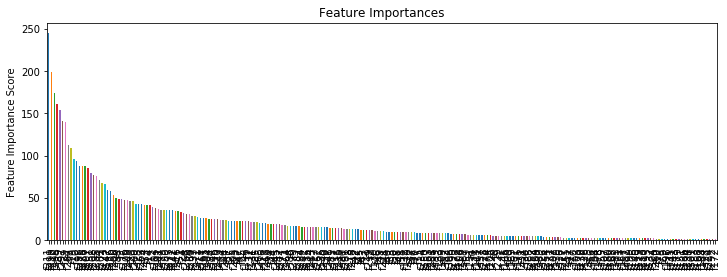

In [168]:
xgb_ = XGBClassifier(
 learning_rate =0.01,
 n_estimators=3000,
 max_depth=3,
 min_child_weight=4,
 gamma=0.3,
 subsample=0.65,
 colsample_bytree=0.75,
 reg_alpha=0.00009,
 objective= 'binary:logistic',
 nthread=5,
 scale_pos_weight=1)

modelfit(xgb_, scaledX, Y, predictors)

In [172]:
soumission16 = xgb_.predict_proba(predscaledX)
np.savetxt("Sub_16.csv", soumission16, delimiter=",")

In [170]:
feat_list = list(feat_imp.index.str.replace('f',''))
new_feat_list = [int(x)+1 for x in feat_list]
X.columns.get_values()[[new_feat_list]]

array(['CashBalance_rel_CreditLimit_month_1', 'Year-2012',
       'CurrentTotalBalance_rel_month_12',
       'CashBalance_rel_DelqCycle_6month_mean',
       'TRANSACTION_AMT_REFUNDED_month_1', 'CreditLimit_sum_rell',
       'CreditLimit_month_1', 'TRANSACTION_AMT_PAID_mean_log',
       'CashBalance_sum', 'TRANSACTION_AMT_PAID_sum', 'CashBalance_mean',
       'stdMultipli', 'TRANSACTION_AMT_PAID_rel_CreditLimit_month_1',
       'TRANSACTION_AMT_PAID_rel_CreditLimit_month_12',
       'CurrentTotalBalance_rel_month_9',
       'TRANSACTION_logAMT_PAID_month_1',
       'CurrentTotalBalance_rel_month_10',
       'TRANSACTION_AMT_PAID_rel_CreditLimit_month_11',
       'CurrentTotalBalance_sum', 'CurrentTotalBalance_rel_month_4',
       'CashBalance_rel_DelqCycle_month_1',
       'CurrentTotalBalance_mean_log', 'CashBalance_mul_DelqCycle_mean',
       'TRANSACTION_relAMT_PAID_month_12',
       'CurrentTotalBalance_rel_month_8', 'TRANSACTION_AMT_PAID_month_12',
       'CreditLimit_std', 'TRANSA

In [74]:
importantFeat = X[['CashBalance_rel_month_1', 'CurrentTotalBalance_rel_month_12',
       'CreditLimit_month_1', 'TRANSACTION_AMT_PAID_sum',
       'TRANSACTION_AMT_REFUNDED_month_1', 'DelqCycle_mean',
       'CashBalance_mean', 'CashBalance_sum',
       'CurrentTotalBalance_rel_month_9', 'TRANSACTION_AMT_PAID_mean_log',
       'DelqCycle_month_12', 'CurrentTotalBalance_rel_month_4',
       'CurrentTotalBalance_sum',
       'TRANSACTION_AMT_PAID_rel_CreditLimit_month1',
       'CurrentTotalBalance_rel_month_10',
       'TRANSACTION_AMT_PAID_rel_CreditLimit_month12',
       'CurrentTotalBalance_rel_month_8',
       'TRANSACTION_AMT_PAID_rel_CreditLimit_month11',
       'TRANSACTION_logAMT_PAID_month_1',
       'TRANSACTION_relAMT_PAID_month_1',
       'TRANSACTION_relAMT_PAID_month_12',
       'CurrentTotalBalance_rel_month_2', 'CurrentTotalBalance_mean_log',
       'TRANSACTION_relAMT_PAID_month_11',
       'TRANSACTION_relAMT_PAID_month_9',
       'CurrentTotalBalance_rel_month_11',
       'CurrentTotalBalance_rel_month_3', 'CashBalance_month_1',
       'TRANSACTION_AMT_PAID_month_12',
       'TRANSACTION_AMT_PAID_rel_CreditLimit_month2',
       'TRANSACTION_AMT_PAID_month_2', 'TRANSACTION_AMT_PAID_mean',
       'TRANSACTION_AMT_PAID_rel_CreditLimit_month6']]

In [32]:
from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits=10) # Define the split - into 10 folds 
kf.get_n_splits(scaledX.values) # returns the number of splitting iterations in the cross-validator

print(kf.get_n_splits(scaledX.values))

10


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
train_preds_df = pd.DataFrame().reindex(index=range(0,11900))
test_preds_df = pd.DataFrame()
temp_test_preds_df = pd.DataFrame()

kk = [1,3,5]

kf.get_n_splits(scaledX.values)
for k in kk:
    count = 0
    for train_index, test_index in kf.split(scaledX.values):
        KFold_X_train, KFold_X_test = scaledX.values[train_index], scaledX.values[test_index]
        KFold_y_train, KFold_y_test = Y.values[train_index], Y.values[test_index]
    
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(KFold_X_train, KFold_y_train)
    
        train_pred = knn.predict_proba(KFold_X_test)
        test_pred = knn.predict_proba(predscaledX)
                
        name = 'scaled_k{}'.format(k)
        temp_name = 'temp_scaled_k{}_{}'.format(k,count)
    
        train_preds_df.loc[test_index,name] = train_pred[:, 1].tolist()
        temp_test_preds_df[temp_name] = test_pred[:, 1].tolist()
        count += 1
    test_preds_df[name] = 0.1*temp_test_preds_df['temp_scaled_k{}_0'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k{}_1'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k{}_2'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k{}_3'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k{}_4'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k{}_5'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k{}_6'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k{}_7'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k{}_8'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k{}_9'.format(k)]
    print('Did k={}'.format(k))

In [ ]:
test_feat_k_df = pd.merge(test_preds_df, preddf, left_index=True, right_index=True)
train_feat_k_df = pd.merge(train_preds_df, scaledX, left_index=True, right_index=True)

In [ ]:
xgb_k = XGBClassifier(
 learning_rate =0.01,
 n_estimators=3000,
 max_depth=3,
 min_child_weight=4,
 gamma=0.3,
 subsample=0.65,
 colsample_bytree=0.75,
 reg_alpha=0.00009,
 objective= 'binary:logistic',
 nthread=5,
 scale_pos_weight=1)

modelfit(xgb_k, train_feat_k_df, Y, predictors)

In [ ]:
feat_list = list(feat_imp.index.str.replace('f',''))
new_feat_list = [int(x)+1 for x in feat_list]
X.columns.get_values()[[new_feat_list]]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score

rf = RandomForestClassifier(bootstrap = False,
    max_depth= 15,
    max_features= 8,
    min_samples_leaf= 2,
    min_samples_split=2,
    n_estimators= 800)

count = 0
for train_index, test_index in kf.split(scaledX.values):
    KFold_X_train, KFold_X_test = X.values[train_index], X.values[test_index]
    KFold_y_train, KFold_y_test = Y.values[train_index], Y.values[test_index]

    rf.fit(KFold_X_train, KFold_y_train)
    
    train_pred = rf.predict_proba(KFold_X_test)
    test_pred = rf.predict_proba(predscaledX)
                
    name = 'scaled_rf'
    temp_name = 'temp_scaled_k_{}'.format(count)
    
    train_preds_df.loc[test_index,name] = train_pred[:, 1].tolist()
    temp_test_preds_df[temp_name] = test_pred[:, 1].tolist()
    count += 1
    print(count)
test_preds_df[name] = 0.1*temp_test_preds_df['temp_scaled_k_0'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_1'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_2'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_3'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_4'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_5'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_6'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_7'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_8'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_9'.format(k)]

In [ ]:
test_feat_k_rf_df = pd.merge(test_preds_df, preddf, left_index=True, right_index=True)
train_feat_k_rf_df = pd.merge(train_preds_df, scaledX, left_index=True, right_index=True)

In [ ]:
xgb_k_rf = XGBClassifier(
 learning_rate =0.01,
 n_estimators=3000,
 max_depth=3,
 min_child_weight=4,
 gamma=0.3,
 subsample=0.65,
 colsample_bytree=0.75,
 reg_alpha=0.00009,
 objective= 'binary:logistic',
 nthread=5,
 scale_pos_weight=1)

modelfit(xgb_k_rf, train_feat_k_rf_df, Y, predictors)

In [ ]:
test_feat_rf_df = test_feat_k_rf_df.drop(['scaled_k1','scaled_k3','scaled_k5'],axis=1)
train_feat_rf_df = train_feat_k_rf_df.drop(['scaled_k1','scaled_k3','scaled_k5'],axis=1)

In [ ]:
xgb_rf = XGBClassifier(
 learning_rate =0.01,
 n_estimators=3000,
 max_depth=3,
 min_child_weight=4,
 gamma=0.3,
 subsample=0.65,
 colsample_bytree=0.75,
 reg_alpha=0.00009,
 objective= 'binary:logistic',
 nthread=5,
 scale_pos_weight=1)

modelfit(xgb_k_rf, train_feat_rf_df, Y, predictors)

In [ ]:
xgb_first = XGBClassifier(
 learning_rate =0.01,
 n_estimators=3000,
 max_depth=3,
 min_child_weight=4,
 gamma=0.3,
 subsample=0.65,
 colsample_bytree=0.75,
 reg_alpha=0.00009,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1)

count = 0

for train_index, test_index in kf.split(scaledX.values):
    KFold_X_train, KFold_X_test = scaledX.values[train_index], scaledX.values[test_index]
    KFold_y_train, KFold_y_test = Y.values[train_index], Y.values[test_index]
    
    KFold_X_train_df = pd.DataFrame(KFold_X_train.tolist())
    KFold_y_train_df = pd.DataFrame(KFold_y_train.tolist())
    KFold_X_test_df = pd.DataFrame(KFold_X_test.tolist())
    KFold_y_test_df = pd.DataFrame(KFold_y_test.tolist())
    
    modelfit(xgb_first, KFold_X_train_df, KFold_y_train_df, predictors)
    
    train_pred = xgb_first.predict_proba(KFold_X_test)
    test_pred = xgb_first.predict_proba(predscaledX)
                
    name = 'scaled_xgb'
    temp_name = 'temp_scaled_k_{}'.format(count)
    
    train_preds_df.loc[test_index,name] = train_pred[:, 1].tolist()
    temp_test_preds_df[temp_name] = test_pred[:, 1].tolist()
    count += 1
test_preds_df[name] = 0.1*temp_test_preds_df['temp_scaled_k_0'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_1'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_2'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_3'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_4'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_5'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_6'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_7'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_8'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_9'.format(k)]

In [ ]:
test_feat_k_rf_xgb_df = pd.merge(test_preds_df, preddf, left_index=True, right_index=True)
train_feat_k_rf_xgb_df = pd.merge(train_preds_df, scaledX, left_index=True, right_index=True)

In [ ]:
xgb_k_rf_xgb = XGBClassifier(
 learning_rate =0.01,
 n_estimators=3000,
 max_depth=3,
 min_child_weight=4,
 gamma=0.3,
 subsample=0.65,
 colsample_bytree=0.75,
 reg_alpha=0.00009,
 objective= 'binary:logistic',
 nthread=5,
 scale_pos_weight=1)

modelfit(xgb_k_rf_xgb, train_feat_k_rf_xgb_df, Y, predictors)

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=4,
                              learning_rate=0.05, n_estimators=700,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

count = 0
for train_index, test_index in kf.split(scaledX.values):
    KFold_X_train, KFold_X_test = scaledX.values[train_index], scaledX.values[test_index]
    KFold_y_train, KFold_y_test = Y.values[train_index], Y.values[test_index]

    model_lgb.fit(KFold_X_train, KFold_y_train)
    
    train_pred = model_lgb.predict(KFold_X_test)
    test_pred = model_lgb.predict(predscaledX)
                
    name = 'scaled_X_lgb'
    temp_name = 'temp_scaled_k_{}'.format(count)
    
    train_preds_df.loc[test_index,name] = train_pred#[:, 0].tolist()
    temp_test_preds_df[temp_name] = test_pred#[:, 0].tolist()
    count += 1
test_preds_df[name] = 0.1*temp_test_preds_df['temp_scaled_k_0'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_1'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_2'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_3'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_4'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_5'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_6'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_7'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_8'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_9'.format(k)]

In [ ]:
test_preds_df

In [ ]:
test_feat_k_rf_xgb_lgb_df = pd.merge(test_preds_df, preddf, left_index=True, right_index=True)
train_feat_k_rf_xgb_lgb_df = pd.merge(train_preds_df, scaledX, left_index=True, right_index=True)

In [ ]:
xgb_k_rf_xgb_lgb = XGBClassifier(
 learning_rate =0.01,
 n_estimators=3000,
 max_depth=3,
 min_child_weight=4,
 gamma=0.3,
 subsample=0.65,
 colsample_bytree=0.75,
 reg_alpha=0.00009,
 objective= 'binary:logistic',
 nthread=5,
 scale_pos_weight=1)

modelfit(xgb_k_rf_xgb_lgb, train_feat_k_rf_xgb_lgb_df, Y, predictors)

In [33]:
from datetime import datetime
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import StratifiedKFold

from keras.models import load_model
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger, Callback
from keras.wrappers.scikit_learn import KerasClassifier

class roc_auc_callback(Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]

    def on_train_begin(self, logs={}):
        return

    def on_train_end(self, logs={}):
        return

    def on_epoch_begin(self, epoch, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):
        y_pred = self.model.predict_proba(self.x, verbose=0)
        roc = roc_auc_score(self.y, y_pred)
        logs['roc_auc'] = roc_auc_score(self.y, y_pred)
        logs['norm_gini'] = ( roc_auc_score(self.y, y_pred) * 2 ) - 1

        y_pred_val = self.model.predict_proba(self.x_val, verbose=0)
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        logs['roc_auc_val'] = roc_auc_score(self.y_val, y_pred_val)
        logs['norm_gini_val'] = ( roc_auc_score(self.y_val, y_pred_val) * 2 ) - 1

        print('\rroc_auc: %s - roc_auc_val: %s - norm_gini: %s - norm_gini_val: %s' % (str(round(roc,5)),str(round(roc_val,5)),str(round((roc*2-1),5)),str(round((roc_val*2-1),5))), end=10*' '+'\n')
        return

    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        return

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod(
            (datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' %
              (thour, tmin, round(tsec, 2)))

def scale_data(X, scaler=None):
    if not scaler:
        scaler = MinMaxScaler(feature_range=(-1, 1))
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler

folds = 4
runs = 1


cv_LL = 0
cv_AUC = 0
cv_gini = 0
fpred = []
avpred = []
avreal = []
i = 0
#avids = []

patience = 30
batchsize = 100

# Let's split the data into folds. I always use the same random number for reproducibility, 
# and suggest that you do the same (you certainly don't have to use 1001).

skf = StratifiedKFold(n_splits=folds)
starttime = timer(None)
#for i, (train_index, test_index) in enumerate(skf.split(np_scaled_raw_X, np_y)):
    
    #X_train, X_val = np_scaled_raw_X[train_index], np_scaled_raw_X[test_index]
    #y_train, y_val = np_y[train_index], np_y[test_index]
    #train_ids, val_ids = tr_ids[train_index], tr_ids[test_index]

for train_index, test_index in kf.split(scaledX.values):
    X_train, X_val = scaledX.values[train_index], scaledX.values[test_index]
    y_train, y_val = Y.values[train_index], Y.values[test_index]    
      
    start_time = timer(None)
    count = 0

    def baseline_model():
        model = Sequential()
        model.add(Dense(300,input_dim=X_train.shape[1],kernel_initializer='glorot_normal',))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dense(100, kernel_initializer='glorot_normal'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dense(50, kernel_initializer='glorot_normal'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dense(25, kernel_initializer='glorot_normal'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.1))
        model.add(Dense(1, activation='sigmoid'))

        # Compile model
        model.compile(optimizer='adam', metrics = ['accuracy'], loss='binary_crossentropy')

        return model

    for run in range(runs):
        print('\n Fold %d - Run %d\n' % ((i + 1), (run + 1)))
        np.random.seed()

        callbacks = [
            roc_auc_callback(training_data=(X_train, y_train),validation_data=(X_val, y_val)),
            EarlyStopping(monitor='norm_gini_val', patience=patience, mode='max', verbose=1),
            ModelCheckpoint(
                    'keras-5fold-run-01-v1-fold-' + str('%02d' % (i + 1)) + '-run-' + str('%02d' % (run + 1)) + '.check',
                    monitor='norm_gini_val', mode='max',
                    save_best_only=True,
                    verbose=1)
        ]

        nnet = KerasClassifier(
            build_fn=baseline_model,
            epochs=5000,
            batch_size=batchsize,
            validation_data=(X_val, y_val),
            verbose=2,
            shuffle=True,
            callbacks=callbacks)

        fit = nnet.fit(X_train, y_train)

        del nnet
        nnet = load_model('keras-5fold-run-01-v1-fold-' + str('%02d' % (i + 1)) + '-run-' + str('%02d' % (run + 1)) + '.check')
        scores_val_run = nnet.predict_proba(X_val, verbose=0)
        LL_run = log_loss(y_val, scores_val_run)
        print('\n Fold %d Run %d Log-loss: %.5f' % ((i + 1), (run + 1), LL_run))
        AUC_run = roc_auc_score(y_val, scores_val_run)
        print(' Fold %d Run %d AUC: %.5f' % ((i + 1), (run + 1), AUC_run))
        print(' Fold %d Run %d normalized gini: %.5f' % ((i + 1), (run + 1), AUC_run*2-1))
        y_pred_run = nnet.predict_proba(predscaledX, verbose=0)
        if run > 0:
            scores_val = scores_val + scores_val_run
            y_pred = y_pred + y_pred_run
        else:
            scores_val = scores_val_run
            y_pred = y_pred_run

    scores_val = scores_val / runs
    y_pred = y_pred / runs
    LL = log_loss(y_val, scores_val)
    print('\n Fold %d Log-loss: %.5f' % ((i + 1), LL))
    AUC = roc_auc_score(y_val, scores_val)
    print(' Fold %d AUC: %.5f' % ((i + 1), AUC))
    print(' Fold %d normalized gini: %.5f' % ((i + 1), AUC*2-1))
    timer(start_time)

    train_pred = nnet.predict_proba(KFold_X_test)
    test_pred = nnet.predict_proba(predscaledX)
                
    name = 'scaled_X_nn'
    temp_name = 'temp_scaled_k_{}'.format(count)
    
    train_preds_df.loc[test_index,name] = train_pred.T
    temp_test_preds_df[temp_name] = test_pred.tolist()
    count += 1
    
    
    if i > 0:
        fpred = pred + y_pred
    else:
        fpred = y_pred
    pred = fpred
    cv_LL = cv_LL + LL
    cv_AUC = cv_AUC + AUC
    cv_gini = cv_gini + (AUC*2-1)
    i += 1

test_preds_df[name] = np.asarray(0.1)*temp_test_preds_df['temp_scaled_k_0'] + \
                            np.asarray(0.1)*temp_test_preds_df['temp_scaled_k_1'] + \
                            np.asarray(0.1)*temp_test_preds_df['temp_scaled_k_2'] + \
                            np.asarray(0.1)*temp_test_preds_df['temp_scaled_k_3'] + \
                            np.asarray(0.1)*temp_test_preds_df['temp_scaled_k_4'] + \
                            np.asarray(0.1)*temp_test_preds_df['temp_scaled_k_5'] + \
                            np.asarray(0.1)*temp_test_preds_df['temp_scaled_k_6'] + \
                            np.asarray(0.1)*temp_test_preds_df['temp_scaled_k_7'] + \
                            np.asarray(0.1)*temp_test_preds_df['temp_scaled_k_8'] + \
                            np.asarray(0.1)*temp_test_preds_df['temp_scaled_k_9']

Using TensorFlow backend.



 Fold 1 - Run 1

Train on 10710 samples, validate on 1190 samples
Epoch 1/5000
 - 1s - loss: 0.5063 - acc: 0.8007 - val_loss: 0.3930 - val_acc: 0.8765
roc_auc: 0.88447 - roc_auc_val: 0.83517 - norm_gini: 0.76894 - norm_gini_val: 0.67034          

Epoch 00001: norm_gini_val improved from -inf to 0.67034, saving model to keras-5fold-run-01-v1-fold-01-run-01.check
Epoch 2/5000
 - 1s - loss: 0.3900 - acc: 0.8496 - val_loss: 0.3221 - val_acc: 0.8866
roc_auc: 0.90337 - roc_auc_val: 0.85734 - norm_gini: 0.80675 - norm_gini_val: 0.71468          

Epoch 00002: norm_gini_val improved from 0.67034 to 0.71468, saving model to keras-5fold-run-01-v1-fold-01-run-01.check
Epoch 3/5000
 - 1s - loss: 0.3360 - acc: 0.8572 - val_loss: 0.2816 - val_acc: 0.8891
roc_auc: 0.90474 - roc_auc_val: 0.85376 - norm_gini: 0.80948 - norm_gini_val: 0.70752          

Epoch 00003: norm_gini_val did not improve from 0.71468
Epoch 4/5000
 - 1s - loss: 0.3102 - acc: 0.8688 - val_loss: 0.2674 - val_acc: 0.8924
roc_auc: 

 - 1s - loss: 0.1428 - acc: 0.9402 - val_loss: 0.4534 - val_acc: 0.8849
roc_auc: 0.96654 - roc_auc_val: 0.84521 - norm_gini: 0.93308 - norm_gini_val: 0.69042          

Epoch 00034: norm_gini_val did not improve from 0.76329
Epoch 35/5000
 - 1s - loss: 0.1532 - acc: 0.9380 - val_loss: 0.4461 - val_acc: 0.8681
roc_auc: 0.97112 - roc_auc_val: 0.82052 - norm_gini: 0.94225 - norm_gini_val: 0.64103          

Epoch 00035: norm_gini_val did not improve from 0.76329
Epoch 00035: early stopping

 Fold 1 Run 1 Log-loss: 0.27917
 Fold 1 Run 1 AUC: 0.88164
 Fold 1 Run 1 normalized gini: 0.76329

 Fold 1 Log-loss: 0.27917
 Fold 1 AUC: 0.88164
 Fold 1 normalized gini: 0.76329

 Time taken: 0 hours 0 minutes and 38.27 seconds.


NameError: name 'KFold_X_test' is not defined

In [ ]:
test_feat_k_rf_xgb_lgb_nn_df = pd.merge(test_preds_df, preddf, left_index=True, right_index=True)
train_feat_k_rf_xgb_lgb_nn_df = pd.merge(train_preds_df, scaledX, left_index=True, right_index=True)

In [ ]:
xgb_k_rf_xgb_lgb_nn = XGBClassifier(
 learning_rate =0.01,
 n_estimators=3000,
 max_depth=3,
 min_child_weight=4,
 gamma=0.3,
 subsample=0.65,
 colsample_bytree=0.75,
 reg_alpha=0.00009,
 objective= 'binary:logistic',
 nthread=5,
 scale_pos_weight=1)

modelfit(xgb_k_rf_xgb_lgb_nn, train_feat_k_rf_xgb_lgb_nn_df, Y, predictors)

In [ ]:
train_feat_k_rf_xgb_lgb_nn_df.head()

In [ ]:
soumission14 = xgb_k_rf_xgb_lgb_nn.predict_proba(test_feat_k_rf_xgb_lgb_nn_df.values)
np.savetxt("Sub_14.csv", soumission14, delimiter=",")

In [ ]:
from sklearn import linear_model

regr = linear_model.LogisticRegression()

count = 0
for train_index, test_index in kf.split(scaledX.values):
    KFold_X_train, KFold_X_test = scaledX.values[train_index], scaledX.values[test_index]
    KFold_y_train, KFold_y_test = Y.values[train_index], Y.values[test_index]

    regr.fit(KFold_X_train, KFold_y_train)
    
    train_pred = regr.predict_proba(KFold_X_test)
    test_pred = regr.predict_proba(predscaledX)
                
    name = 'scaled_regr'
    temp_name = 'temp_scaled_k_{}'.format(count)
    
    train_preds_df.loc[test_index,name] = train_pred[:, 1].tolist()
    temp_test_preds_df[temp_name] = test_pred[:, 1].tolist()
    count += 1
test_preds_df[name] = 0.1*temp_test_preds_df['temp_scaled_k_0'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_1'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_2'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_3'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_4'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_5'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_6'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_7'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_8'.format(k)] + \
                            0.1*temp_test_preds_df['temp_scaled_k_9'.format(k)]

In [ ]:
test_feat_k_rf_xgb_lgb_nn_regr_df = pd.merge(test_preds_df, preddf, left_index=True, right_index=True)
train_feat_k_rf_xgb_lgb_nn_regr_df = pd.merge(train_preds_df, scaledX, left_index=True, right_index=True)

In [ ]:
xgb_k_rf_xgb_lgb_nn_regr = XGBClassifier(
 learning_rate =0.01,
 n_estimators=3000,
 max_depth=3,
 min_child_weight=4,
 gamma=0.3,
 subsample=0.65,
 colsample_bytree=0.75,
 reg_alpha=0.00009,
 objective= 'binary:logistic',
 nthread=5,
 scale_pos_weight=1)

modelfit(xgb_k_rf_xgb_lgb_nn_regr, train_feat_k_rf_xgb_lgb_nn_regr_df, Y, predictors)

In [ ]:
train_feat_k_rf_xgb_lgb_nn_regr_df[['scaled_k1' , 'scaled_k3', 'scaled_k5', 'scaled_rf', 'scaled_xgb', 'scaled_X_lgb', 'scaled_X_nn', 'scaled_regr']]